In [1]:
#import modules
import os
import glob
import pandas as pd
#os.chdir("D:\\CsvToCombine")
filepath = 'D:\\NewFinalDatasetsForNeuralNetwork\\CrashScenarios'
dataset = pd.read_csv(filepath +'\\Crash_ENCAP50PedDir0.0-5.0_PedDirStep0.1LateralDist0.0-8.0_LateralDistStep0.1-_Dttime090320231312.csv')
dataset

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,TTC
0,2.500000,-0.0,0.0,1.388889,0.000000
1,3.500000,-0.1,0.0,1.388889,0.072000
2,4.500000,-0.2,0.0,1.388889,0.144000
3,5.500000,-0.3,0.0,1.388889,0.216000
4,6.500000,-0.4,0.0,1.388889,0.288000
...,...,...,...,...,...
4126,78.125394,-7.6,5.0,1.388889,5.492902
4127,79.120465,-7.7,5.0,1.388889,5.565177
4128,80.115536,-7.8,5.0,1.388889,5.637452
4129,81.110607,-7.9,5.0,1.388889,5.709727


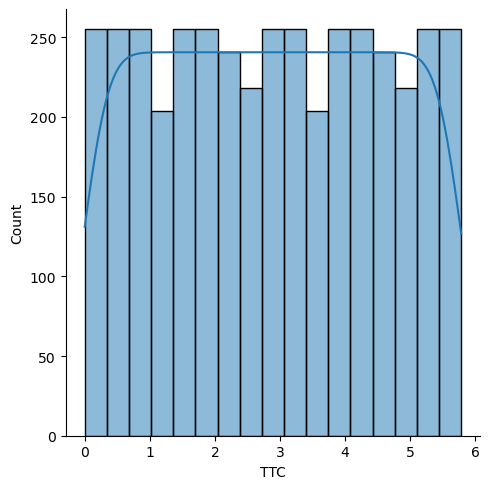

In [2]:
import seaborn as sns
sns.displot(dataset['TTC'], kde = True)

In [3]:
#Splitting TTC from the other columns
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split

# 80-20 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# This cell is only used for plotting the training dataset in the below cell, alongwith the column names
joined_train_dataset = X_train
train_dataset = pd.DataFrame(joined_train_dataset, columns = ['NORMALIZED PEDESTRIAN POSITION X', 'NORMALIZED PEDESTRIAN POSITION Y', 'NORMALIZED PEDESTRIAN DIRECTION', 'NORMALIZED PEDESTRIAN SPEED'])
train_dataset.loc[:,'TTC'] = y_train
#print(train_dataset)

c:\Users\thiru\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\thiru\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


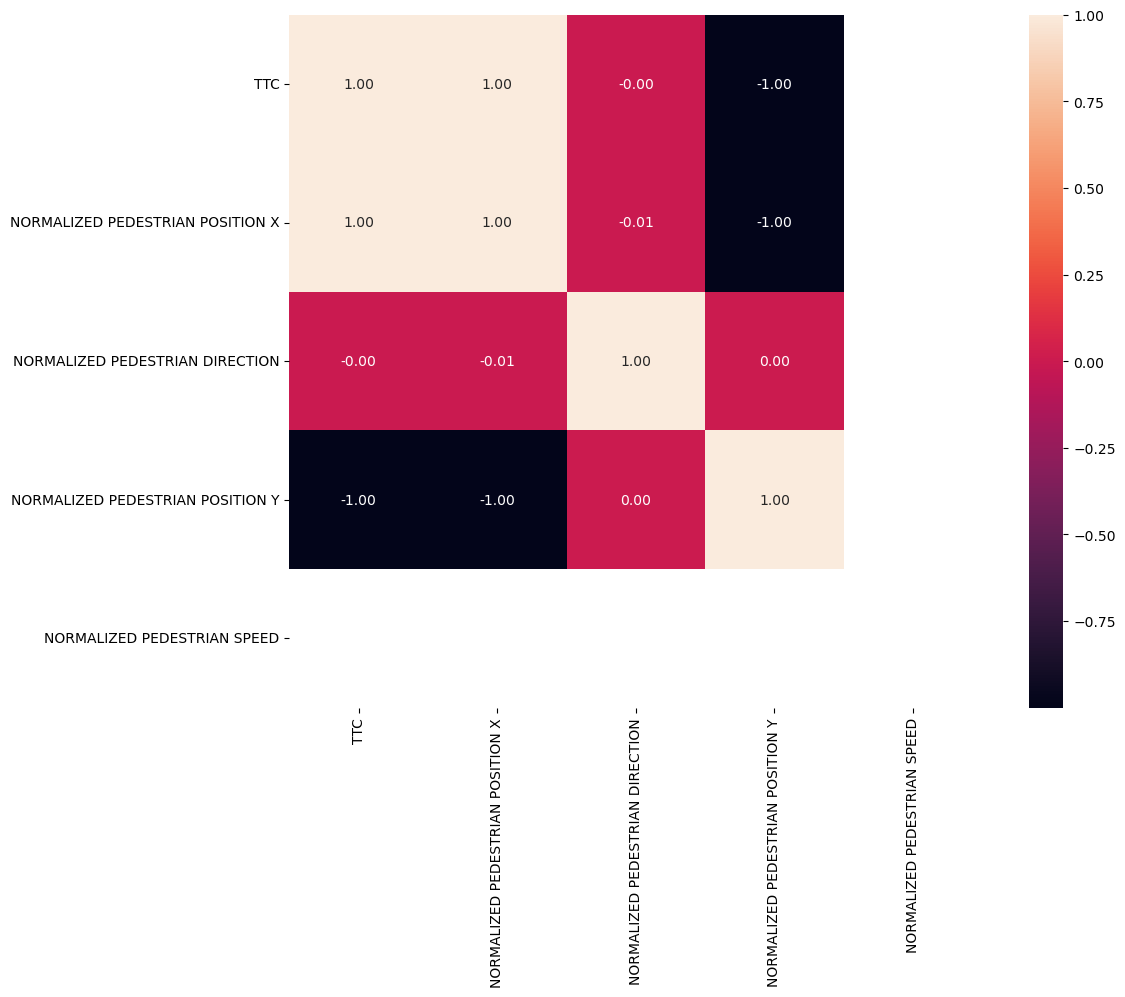

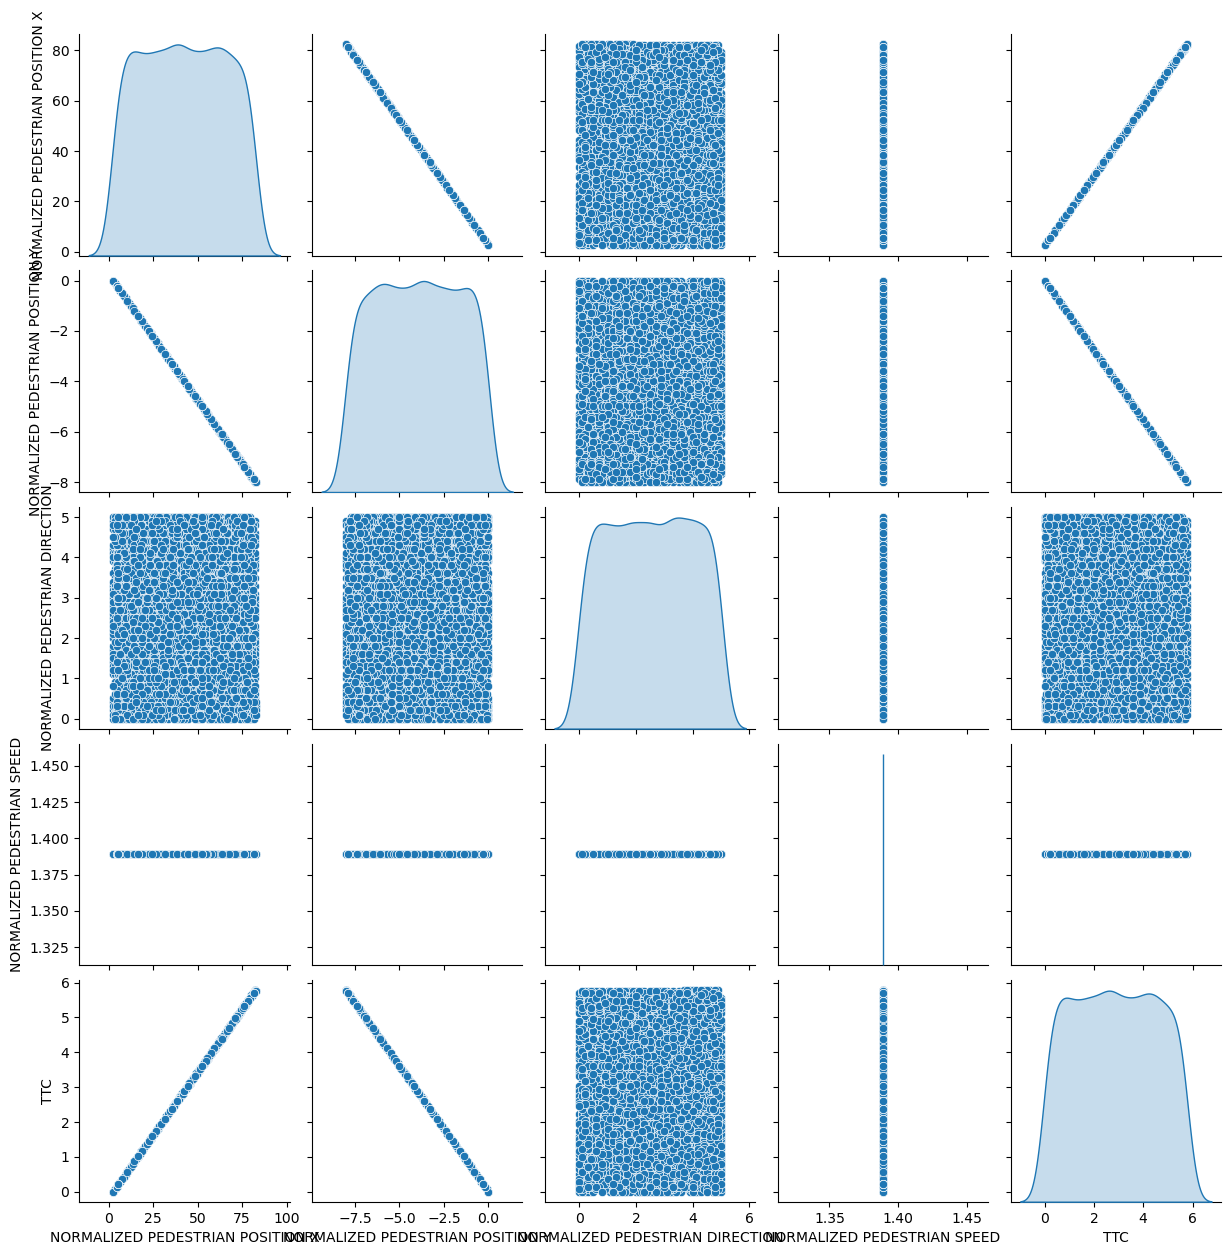

In [6]:
# Dataplots
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = dataset.corr()
plt.subplots(figsize=(12,9))
k=10
cols = corr_matrix.nlargest(k,'TTC')['TTC'].index
cm = np.corrcoef(train_dataset[cols].values.T)

#sns.heatmap(corr_matrix, vmax=0.9, square=True)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#Plotting the dataset columns to find patterns
sns.pairplot(train_dataset, diag_kind='kde')

In [7]:
import tensorflow as tf
import keras
from keras import layers

# Defining first layer of the neural network, which normalizes the input data on the fly
normalizer_layer = keras.layers.Normalization(axis=-1)
normalizer_layer = layers.Normalization(input_shape=[4,], axis=None)
# Adapting normalizer layer to the input train data shape
normalizer_layer.adapt(np.array(X_train))

# Defines the model and compilation
def build_and_compile_model(normalizer_layer):
  nn_model = keras.Sequential([
      normalizer_layer,
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  nn_model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['mse'])
  return nn_model

In [8]:
# Building the neural network model and compiling it using the normalization layer adapted to the shape of our input training dataset
regression_model = build_and_compile_model(normalizer_layer)
regression_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 4)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,964
Trainable params: 16,961
Non-trainable params: 3
____________________________________________________

In [9]:
# Report for training data for non linear model
#%%time
history = regression_model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    verbose=1,
# Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/1000
42/42 [==============================] - 1s 10ms/step - loss: 3.2352 - mse: 3.2352 - val_loss: 0.0500 - val_mse: 0.0500
Epoch 2/1000
42/42 [==============================] - 0s 6ms/step - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 3/1000
42/42 [==============================] - 0s 5ms/step - loss: 8.1367e-04 - mse: 8.1367e-04 - val_loss: 4.0352e-04 - val_mse: 4.0352e-04
Epoch 4/1000
42/42 [==============================] - 0s 4ms/step - loss: 3.4058e-04 - mse: 3.4058e-04 - val_loss: 2.6386e-04 - val_mse: 2.6386e-04
Epoch 5/1000
42/42 [==============================] - 0s 4ms/step - loss: 2.1594e-04 - mse: 2.1594e-04 - val_loss: 1.7437e-04 - val_mse: 1.7437e-04
Epoch 6/1000
42/42 [==============================] - 0s 4ms/step - loss: 1.3965e-04 - mse: 1.3965e-04 - val_loss: 1.1053e-04 - val_mse: 1.1053e-04
Epoch 7/1000
42/42 [==============================] - 0s 4ms/step - loss: 8.2706e-05 - mse: 8.2706e-05 - val_loss: 6.1819e-05 - val_mse: 6.1819

In [ ]:
regression_model.save('TTC_regression_model.h5')

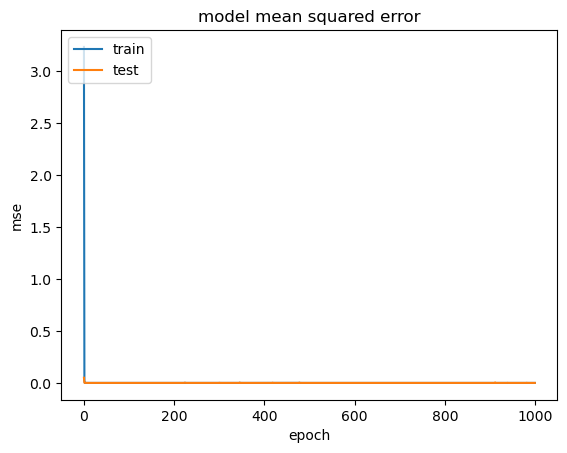

In [10]:
# Summarize history for Loss function
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mean squared error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
#Evaluating the model on the test data
regression_model.evaluate(X_test,y_test , verbose=1)

26/26 [==============================] - 0s 2ms/step - loss: 2.2819e-06 - mse: 2.2819e-06


[2.2818787783762673e-06, 2.2818787783762673e-06]

In [13]:
# Plotting Actual TTC values vs. predicted for the test set
def predict_and_plot(dnn_model, X_test, y_test):
    
    tf.data.experimental.enable_debug_mode()
    test_predictions = dnn_model.predict(X_test).flatten()

    a = plt.axes(aspect='equal')
    plt.scatter(y_test,test_predictions)
    plt.xlabel('True Values [TTC]')
    plt.ylabel('Predictions [TTC]')
    lims = [0, 6]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)

26/26 [==============================] - 0s 3ms/step


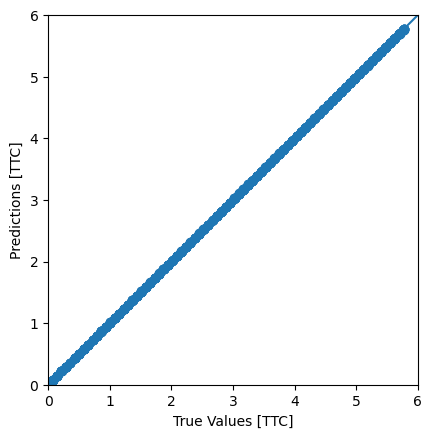

In [14]:
predict_and_plot(regression_model, X_test, y_test)

In [15]:
print(y_test[:10])
prediction = regression_model.predict(X_test[:10])
print(prediction.transpose())

[0.07205805 5.47363394 4.39554107 3.6744678  3.02477855 1.95001123
 1.36891937 3.96005428 1.51227869 1.15368823]
1/1 [==============================] - 0s 24ms/step
[[0.07095904 5.471712   4.3942337  3.6727552  3.0235004  1.9498265
  1.3682238  3.9589124  1.5116163  1.1532362 ]]
